Dana Rozenblum & Efrat Magidov
# Word Embedding - Home Assigment
## Dr. Omri Allouche 2021. YData Deep Learning Course

[Open in Google Colab](https://colab.research.google.com/github/omriallouche/ydata_deep_learning_2021/blob/master/assignments/word_vectors_text_classification/DL_word_embedding_assignment.ipynb)

    
In this exercise, you'll use word vectors trained on a corpus of lyrics of songs from MetroLyrics ([http://github.com/omriallouche/ydata_deep_learning_2021/blob/master/data/metrolyrics.parquet](/data/metrolyrics.parquet)).
The dataset contains these fields for each song, in CSV format:
1. index
1. song
1. year
1. artist
1. genre
1. lyrics

Before doing this exercise, we recommend that you go over the "Bag of words meets bag of popcorn" tutorial (https://www.kaggle.com/c/word2vec-nlp-tutorial)

Other recommended resources:
- https://rare-technologies.com/word2vec-tutorial/
- https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial

### Train word vectors
Train word vectors using the Skipgram Word2vec algorithm and the gensim package.
Make sure you perform the following:
- Tokenize words
- Lowercase all words
- Remove punctuation marks
- Remove rare words
- Remove stopwords

Use 300 as the dimension of the word vectors. Try different context sizes.

In [6]:
import pandas as pd
import nltk
nltk.download('stopwords')
import re
from gensim.models import word2vec
from sklearn.cluster import KMeans
import numpy as np

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
# for cleaning text, removing stop words, and applying lemmatization and stemming

'''
Preprocess a string.
:parameter
    :param text: string - name of column containing text
    :param lst_stopwords: list - list of stopwords to remove
    :param flg_stemm: bool - whether stemming is to be applied
    :param flg_lemm: bool - whether lemmitisation is to be applied
:return
    cleaned text
'''
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=False, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'([^a-zA-Z0-9])', ' ', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [10]:
# load file
songs = pd.read_parquet("https://raw.githubusercontent.com/omriallouche/ydata_deep_learning_2021/master/data/metrolyrics.parquet")

# create a list of generic stop words for the English vocabulary 
lst_stopwords = nltk.corpus.stopwords.words("english")

# clean lyrics
songs["clean_lyrics"] = (songs["lyrics"]).apply(lambda x: 
          utils_preprocess_text(x, flg_stemm=False, flg_lemm=False, 
          lst_stopwords=lst_stopwords))

# create list of lists of unigrams
corpus = songs["clean_lyrics"]
lst_corpus = []
for string in corpus:
    lst_words = string.split()
    lst_grams = [" ".join(lst_words[i:i+1]) for i in range(0, len(lst_words), 1)]
    lst_corpus.append(lst_grams)

# Set parameters values
num_features = 300    # Word vector dimensionality                      
min_word_count = 10   # Minimum word count                        

In [11]:
# Train a model with context size of 5

context = 5          # Context window size

# Initialize and train the model (this will take some time)
model_5 = word2vec.Word2Vec(lst_corpus, size=num_features, min_count = min_word_count, \
            window = context)

This cell takes about 40 minutes run time, you may skip running it and look at the results we got in the saved notebook. In case you want to run it uncomment it.

In [17]:
"""
# evaluate the model by applying k-means on the word vectors

word_vectors = model_5.wv.vectors
num_clusters = 2000

# Initalize a k-means object and use it to extract centroids
kmeans_clustering = KMeans( n_clusters = num_clusters )
idx = kmeans_clustering.fit_predict( word_vectors )

# For the first 10 clusters
for cluster in range(0,10):
    print ("\nCluster %d" % cluster)
    print (np.array(model_5.wv.index2word)[idx == cluster])
"""


Cluster 0
['kin' 'kelly' 'capital' 'ing' 'cking' 'tch' 'rated' 'ckin']

Cluster 1
['hesitation' 'reckon' 'planning' ... 'desiree' 'jackdaw' 'fbula']

Cluster 2
['rotten' 'parts' 'scar' 'crushed' 'dread' 'web' 'beaten' 'womb'
 'swallowed' 'bled' 'carved' 'choking' 'stripped' 'shatter' 'scarred'
 'venom' 'pulse' 'eaten' 'chained' 'crushing' 'bruised' 'carve' 'claws'
 'shield' 'bleeds' 'thorn' 'drained' 'severed' 'organs' 'maggots'
 'fragments' 'removed' 'debris' 'drenched' 'shreds']

Cluster 3
['firm' 'group' 'gutter' 'proper' 'peoples' 'rugged' 'mans' 'karma'
 'worldwide' 'strictly' 'definitely' 'hottest' 'bruh' 'fakin' 'homeboys'
 'motto' 'member' 'petty' 'celebrity' 'rhymin' 'juvenile' 'overseas'
 'freestyle' 'loc' 'illegal' 'prolly' 'buildin' 'switched' 'stealin'
 'payback' 'mtv' 'motherfucka' 'realer' 'certified' 'snitches' 'groupies'
 'jason' 'motherfuck' 'direct' 'crook' 'jigga' 'flint' 'turf' 'lames'
 'bendin' 'sicker' 'claimin' 'partners' 'crip' 'posed' 'blazed' 'cuff'
 'witcha

In [ ]:
# Train a model with context size of 7

context = 7          # Context window size

# Initialize and train the model (this will take some time)
model_7 = word2vec.Word2Vec(lst_corpus, size=num_features, min_count = min_word_count, \
            window = context)

This cell takes about 90 minutes run time, you may skip running it and look at the results we got in the saved notebook. In case you want to run it uncomment it.

In [ ]:
"""
# evaluate the model by applying k-means on the word vectors

word_vectors = model_7.wv.vectors
num_clusters = 2000

# Initalize a k-means object and use it to extract centroids
kmeans_clustering = KMeans( n_clusters = num_clusters )
idx = kmeans_clustering.fit_predict( word_vectors )

# For the first 10 clusters
for cluster in range(0,10):
    print ("\nCluster %d" % cluster)
    print (np.array(model_7.wv.index2word)[idx == cluster])
"""


Cluster 0
['moan' 'bees' 'humming' 'whine' 'theme' 'playground' 'shouting' 'musical'
 'sounding' 'warmer' 'moaning' 'cheers' 'stations' 'reads' 'poem' 'chime'
 'siren' 'lamp' 'mount' 'melodies' 'chilly' 'swings' 'valentine' 'organ'
 'poems' 'zion' 'chords' 'tuned' 'aloud' 'glistening' 'buzzing' 'irish'
 'rendezvous' 'hummin' 'violin' 'barking' 'doves' 'glisten' 'tones'
 'tossing' 'trumpet' 'january' 'timber' 'caffeine' 'chord' 'cyclone'
 'caribbean' 'february' 'moans' 'harp' 'trumpets' 'sidewalks' 'whistling'
 'soundtrack' 'serenade' 'wailing' 'strolling' 'prairie' 'bluebirds'
 'howlin' 'rung' 'leaned' 'nursery' 'noises' 'cathedral' 'wraps' 'nile'
 'glee' 'loudly' 'gabriel' 'hymn' 'brook' 'sandman' 'breezes' 'wills'
 'rooftops' 'whistles' 'gliding' 'romancing' 'smoky' 'cheering' 'bough'
 'cricket' 'drone' 'dreamy' 'marrakesh' 'blackbird' 'jericho' 'marionette'
 'lullabies' 'acoustic' 'saloon' 'carol' 'orchestra' 'sighing' 'chimes'
 'lilac' 'nightingale' 'aisles' 'coyote' 'snowing' 'wi

In [ ]:
# Train a model with context size of 10

context = 10          # Context window size

# Initialize and train the model (this will take some time)
model_10 = word2vec.Word2Vec(lst_corpus, size=num_features, min_count = min_word_count, \
            window = context)

This cell takes about 140 minutes run time, you may skip running it and look at the results we got in the saved notebook. In case you want to run it uncomment it.

In [ ]:
"""
# evaluate the model by applying k-means on the word vectors

word_vectors = model_10.wv.vectors
num_clusters = 2000

# Initalize a k-means object and use it to extract centroids
kmeans_clustering = KMeans( n_clusters = num_clusters )
idx = kmeans_clustering.fit_predict( word_vectors )

# For the first 10 clusters
for cluster in range(0,10):
    print ("\nCluster %d" % cluster)
    print (np.array(model_10.wv.index2word)[idx == cluster])
"""


Cluster 0
['kin' 'gee' 'fee' 'international' 'motto' 'celebrity' 'ing' 'shouts' '99'
 'andre' 'bubba' 'marshall' 'ant' 'chino' 'grammy' 'veteran' 'mtv' 'fred'
 'ricky' 'officer' 'joey' 'gotti' 'sonny' 'wiz' 'upgrade' 'scarface' '3rd'
 'jigga' 'flint' 'cking' 'stan' 'biatch' 'ny' 'hahaha' 'champ' 'blazed'
 'mayor' 'singers' 'harry' 'notorious' 'mase' 'hobby' '98' 'ts' 'kevin'
 'jamaican' 'feat' 'aka' 'diggity' 'kobe' 'youngest' 'ganja' 'capri'
 'dammit' 'turner' 'jon' 'obama' 'exclusive' 'yung' 'federal' 'ceo' 'fab'
 'craig' 'noreaga' 'pos' 'midwest' 'carter' 'kenny' 'tab' 'fag' 'kennedy'
 'ft' 'freddy' 'dc' 'keef' 'ness' 'xl' 'cormega' 'shorties' 'rodney' 'azz'
 'nickatina' 'sup' 'cnn' 'twitter' 'clinton' 'aiyo' 'lp' 'parker' 'dunn'
 'lloyd' 'manager' 'foo' 'inc' 'marquis' 'atl' 'afroman' 'shawn' 'greg'
 'mario' '92' 'shoutout' 'snitchin' 'swisha' 'haircut' 'woof' 'warren'
 'juggalo' 'holmes' 'nelly' 'beotch' 'theodore' 'pusha' 'trice' 'homo'
 'blam' '97' 'geah' 'jammin' 'sy' 'frankli

This is not an objectively measurable results but from the clusteres we viewd it seemes that context window of 5 acchieved the best clusters.

### Review most similar words
Get initial evaluation of the word vectors by analyzing the most similar words for a few interesting words in the text. 

Choose words yourself, and find the most similar words to them.

In [ ]:
# context window of 5

print("Most similar words to mirror:")
print(model_5.wv.most_similar('mirror')[:5])

print("\nMost similar words to satan:")
print(model_5.wv.most_similar('satan')[:5])

print("\nMost similar words to diamond:")
print(model_5.wv.most_similar('diamond')[:5])

Most similar words to mirror:
[('reflection', 0.7555069923400879), ('staring', 0.5845102071762085), ('clearer', 0.5752573609352112), ('rear', 0.5657057762145996), ('lens', 0.5607564449310303)]

Most similar words to satan:
[('unholy', 0.7625582218170166), ('servants', 0.6956019401550293), ('lucifer', 0.6908077001571655), ('sinners', 0.6833586096763611), ('worship', 0.6760253310203552)]

Most similar words to diamond:
[('rings', 0.7429622411727905), ('diamonds', 0.7175111770629883), ('pinky', 0.6558115482330322), ('gold', 0.6456952095031738), ('pearls', 0.6113399267196655)]


In [ ]:
# context window of 7

print("Most similar words to mirror:")
print(model_7.wv.most_similar('mirror')[:5])

print("\nMost similar words to satan:")
print(model_7.wv.most_similar('satan')[:5])

print("\nMost similar words to diamond:")
print(model_7.wv.most_similar('diamond')[:5])

Most similar words to mirror:
[('reflection', 0.7537358999252319), ('clearer', 0.6400866508483887), ('staring', 0.624579906463623), ('rear', 0.5485295057296753), ('stare', 0.5403313636779785)]

Most similar words to satan:
[('unholy', 0.770027220249176), ('sinners', 0.7215563058853149), ('lucifer', 0.7213795185089111), ('majesty', 0.6992426514625549), ('worship', 0.699133038520813)]

Most similar words to diamond:
[('diamonds', 0.7461169958114624), ('rings', 0.7418354153633118), ('pinky', 0.6669229865074158), ('pearls', 0.6374425292015076), ('gold', 0.6332827210426331)]


In [ ]:
# context window of 10

print("Most similar words to mirror:")
print(model_10.wv.most_similar('mirror')[:5])

print("\nMost similar words to satan:")
print(model_10.wv.most_similar('satan')[:5])

print("\nMost similar words to diamond:")
print(model_10.wv.most_similar('diamond')[:5])

Most similar words to mirror:
[('reflection', 0.7288041114807129), ('clearer', 0.6742430925369263), ('staring', 0.5935873985290527), ('images', 0.5353515148162842), ('view', 0.5290734171867371)]

Most similar words to satan:
[('unholy', 0.7811609506607056), ('sinners', 0.720561146736145), ('christians', 0.7191603779792786), ('christian', 0.6939611434936523), ('incarnate', 0.6932411789894104)]

Most similar words to diamond:
[('rings', 0.7272056341171265), ('diamonds', 0.7032471895217896), ('pinky', 0.6276512145996094), ('gold', 0.6078565120697021), ('pearls', 0.5925832986831665)]


With this test it is hard do determine which context window performs better. For the word 'satan' it seems like we get the best results with 7, but for 'mirror' maybe with 10? All the results can actually make sense when thinking about song lyrics.

### Word Vectors Algebra
We've seen in class examples of algebraic games on the word vectors (e.g. man - woman + king = queen ). 

Try a few vector algebra terms, and evaluate how well they work. Try to use the Cosine distance and compare it to the Euclidean distance.

In [ ]:
# Using the cosine distance (word2vec default)

print("(king - man) + woman = ?") 
result = model_5.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

print("\npoor + money = ?") 
result = model_5.wv.most_similar(positive=['poor', 'money'], topn=1)
print(result)

print("\nhungry - food = ?") 
result = model_5.wv.most_similar(positive=['hungry'],negative=['food'], topn=1)
print(result)

(king - man) + woman = ?
[('queen', 0.6394755840301514)]

poor + money = ?
[('rich', 0.6774163246154785)]

hungry - food = ?
[('helpless', 0.40057373046875)]


In [ ]:
# Using the euclidean distance

kmw_distances = []
pm_distances = []
hf_distances = []

kmw = model_5.wv['king'] - model_5.wv['man'] + model_5.wv['woman']
pm = model_5.wv['poor'] + model_5.wv['money']
hf = model_5.wv['hungry'] - model_5.wv['food']

for i, word_vec in enumerate(model_5.wv.vectors):
    kmw_distances.append(np.linalg.norm(word_vec- kmw))
    pm_distances.append(np.linalg.norm(word_vec- pm))
    hf_distances.append(np.linalg.norm(word_vec- hf))


print("(king - man) + woman = ?") 
result = model_5.wv.most_similar(positive=[model_5.wv.vectors[kmw_distances.index(min(kmw_distances))]], topn=1)[0][0]
print(result)

print("\npoor + money = ?") 
result = model_5.wv.most_similar(positive=[model_5.wv.vectors[pm_distances.index(min(pm_distances))]], topn=1)[0][0]
print(result)

print("\nhungry - food = ?") 
result = model_5.wv.most_similar(positive=[model_5.wv.vectors[hf_distances.index(min(hf_distances))]], topn=1)[0][0]
print(result)

(king - man) + woman = ?
king

poor + money = ?
money

hungry - food = ?
struggles


We received better results using the cosine distance.

## Sentiment Analysis
Estimate sentiment of words using word vectors.  
In this section, we'll use the SemEval-2015 English Twitter Sentiment Lexicon.  
The lexicon was used as an official test set in the SemEval-2015 shared Task #10: Subtask E, and contains a polarity score for words in range -1 (negative) to 1 (positive) - http://saifmohammad.com/WebPages/SCL.html#OPP

Build a regressor for the sentiment of a word given its word vector, in range -1 to 1. Split the data to a train and test sets, and report the model performance on both sets.

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.metrics as metrics
import xgboost as xgb

In [ ]:
# For reporting regression results

def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [ ]:
#XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

    xgb_model = xgb.XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [ ]:
# load data
lexicon = pd.read_csv('SemEval2015-English-Twitter-Lexicon.txt', delimiter = "\t", header=None)

# clean
lexicon["clean_words"] = (lexicon[1]).apply(lambda x: 
          utils_preprocess_text(x, flg_stemm=False, flg_lemm=False, 
          lst_stopwords=None))

# add word vectors
lexicon['word_vec'] = lexicon['clean_words'].apply(lambda x: model_5.wv[x] if x in model_5.wv.vocab else None)

# remove words without vectors
lexicon.dropna(inplace=True)

# rename columns
lexicon.rename(columns = {0:'polarity', 1:'original_word'}, inplace = True)

# create the data set
word_vec_zip = zip(lexicon['polarity'], lexicon['word_vec'])
word_vec_dict = dict(word_vec_zip)
df_for_regression = pd.DataFrame.from_dict(word_vec_dict, orient='index')

# spliting the dataset into training and test set
X = df_for_regression.values
y = df_for_regression.index
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate an XGBRegressor
xgr = xgb.XGBRegressor()

# Fit the classifier to the training set
xgr.fit(X_train, y_train)

[21:08:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
# train set results

y_pred = xgr.predict(X_train)
regression_results(y_train, y_pred)

explained_variance:  0.998
r2:  0.998
MAE:  0.0111
MSE:  0.0007
RMSE:  0.0258


In [ ]:
# test set results

y_pred = xgr.predict(X_test)
regression_results(y_test, y_pred)

explained_variance:  0.3438
r2:  0.3358
MAE:  0.3543
MSE:  0.2106
RMSE:  0.459


We will try to optimize the XGBRegressor parameters:

In [ ]:
# this cell takes about 10 minutes to run, if you skip it you can use best_params variable which appears commented in the next cell
best_params = hyperParameterTuning(X_train, y_train)
best_params

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  9.4min finished


{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 3,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

In [ ]:
# Recheck test measures, uncomment best_params if you didn't run the previous cell

# best_params = {'colsample_bytree': 0.7,
#              'learning_rate': 0.1,
#              'max_depth': 5,
#              'min_child_weight': 3,
#              'n_estimators': 500,
#              'objective': 'reg:squarederror',
#              'subsample': 0.7}

tuned_xgb = xgb.XGBRegressor(**best_params)
tuned_xgb.fit(X_train, y_train)
y_pred = tuned_xgb.predict(X_test)
regression_results(y_test, y_pred)

explained_variance:  0.3434
r2:  0.3378
MAE:  0.3833
MSE:  0.21
RMSE:  0.4583


For most of the runs, test MSE is a little lower now

Use your trained model from the previous question to predict the sentiment score of words in the lyrics corpus that are not part of the original sentiment dataset. Review the words with the highest positive and negative sentiment. Do the results make sense?

In [ ]:
# combine words and their vectors
source_words = pd.DataFrame(data=model_5.wv.index2word)
source_words.columns = ['word']
source_words['vector'] = source_words['word'].apply(lambda x: model_5.wv[x])

# filter words that exist in the sentiment data
words_filtered = source_words[~source_words.word.isin(lexicon.clean_words)]

# arange the vectors as features
word_vec_zip = zip(words_filtered['word'], words_filtered['vector'])
word_vec_dict = dict(word_vec_zip)
df2 = pd.DataFrame.from_dict(word_vec_dict, orient='index')
X2 = df2.values

# predict and print results
y_pred2 = tuned_xgb.predict(X2)
pred_sentiment = pd.DataFrame(y_pred2, df2.index, columns=['pred_sentiment'])
pred_sentiment.sort_values(by=['pred_sentiment'], ascending=False,inplace=True)

print("Words with highest positive sentiment:")
print(pred_sentiment.iloc[0:9,:])

pred_sentiment.sort_values(by=['pred_sentiment'], ascending=True,inplace=True)

print("\nWords with highest negative sentiment:")
print(pred_sentiment.iloc[0:9,:])

Words with highest positive sentiment:
          pred_sentiment
waadinka        0.961300
pluto           0.960346
ropa            0.921917
halona          0.921380
volare          0.908038
eastern         0.905995
soared          0.898138
saturn          0.893545
jun             0.878409

Words with highest negative sentiment:
             pred_sentiment
submission        -1.056423
illness           -0.939690
breeding          -0.936446
aborted           -0.929995
dismembered       -0.907524
loathing          -0.897917
faceless          -0.879761
digested          -0.870475
surgical          -0.847290


Our results make sense only in the negative section, where we got words like "submission", "illness", "loathing", "faceless".

### Visualize Word Vectors
In this section, you'll plot words on a 2D grid based on their inner similarity. We'll use the tSNE transformation to reduce dimensions from 300 to 2. You can get sample code from https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial or other tutorials online.

Perform the following:
- Keep only the 3,000 most frequent words (after removing stopwords)
- For this list, compute for each word its relative abundance in each of the genres
- Compute the ratio between the proportion of each word in each genre and the proportion of the word in the entire corpus (the background distribution)
- Pick the top 50 words for each genre. These words give good indication for that genre. Join the words from all genres into a single list of top significant words. 
- Compute tSNE transformation to 2D for all words, based on their word vectors
- Plot the list of the top significant words in 2D. Next to each word output its text. The color of each point should indicate the genre for which it is most significant.

You might prefer to use a different number of points or a slightly different methodology for improved results.  
Analyze the results.

In [27]:
from tqdm import tqdm
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

In [ ]:
# Keep only the 3,000 most frequent words (after removing stopwords)
most_freq_words = pd.DataFrame(index=model_5.wv.index2entity[:3000], columns=songs.genre.unique())

# counting words, takes about 10 minutes
for word in tqdm(most_freq_words.index, position=0, leave=True):
    for col in most_freq_words.columns:
        most_freq_words.loc[word, col] = songs[songs.genre== col].clean_lyrics.apply(lambda x: x.count(word)).sum()
    most_freq_words.loc[word, 'total_freq'] = songs.clean_lyrics.apply(lambda x: x.count(word)).sum()

100%|██████████| 3000/3000 [10:43<00:00,  4.66it/s]


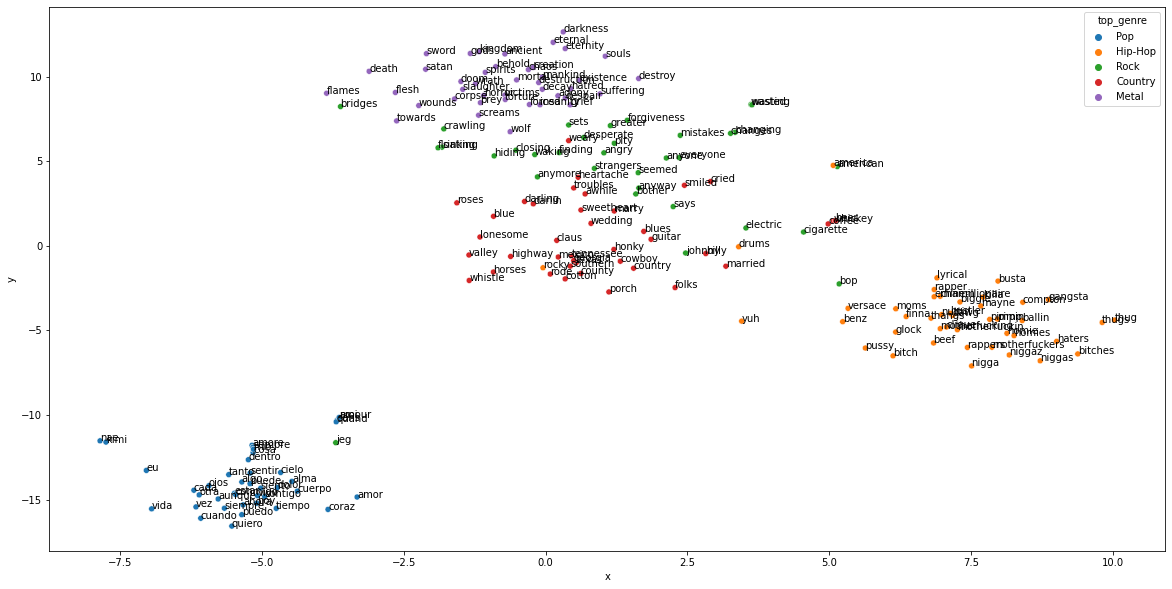

In [ ]:
# Compute the ratio between the proportion of each word in each genre and the proportion of the word in the entire corpus (the background distribution)
most_freq_words['Pop_ratio'] = most_freq_words['Pop'] / most_freq_words['total_freq']
most_freq_words['Hip-Hop_ratio'] = most_freq_words['Hip-Hop'] / most_freq_words['total_freq']
most_freq_words['Rock_ratio'] = most_freq_words['Rock'] / most_freq_words['total_freq']
most_freq_words['Country_ratio'] = most_freq_words['Country'] / most_freq_words['total_freq']
most_freq_words['Metal_ratio'] = most_freq_words['Metal'] / most_freq_words['total_freq']

# cahnge dtype to numeric
most_freq_words = most_freq_words.apply(pd.to_numeric, errors='coerce', axis=1)

# Pick the top 50 words for each genre
top_pop = most_freq_words.nlargest(40, 'Pop_ratio')
top_hiphop = most_freq_words.nlargest(40, 'Hip-Hop_ratio')
top_rock = most_freq_words.nlargest(40, 'Rock_ratio')
top_country = most_freq_words.nlargest(40, 'Country_ratio')
top_metal = most_freq_words.nlargest(40, 'Metal_ratio')

# Join the words from all genres into a single list of top significant words
top_words = top_pop.index.to_list() + top_hiphop.index.to_list() + top_rock.index.to_list() + top_country.index.to_list() + top_metal.index.to_list()

# remove duplicates
top_words = list( dict.fromkeys(top_words) )

# combine words and their vectors
df_top = pd.DataFrame(data=top_words)
df_top.columns = ['word']
df_top['vector'] = df_top['word'].apply(lambda x: model_5.wv[x])

# arange the vectors as features
top_vec_zip = zip(df_top['word'], df_top['vector'])
top_vec_dict = dict(top_vec_zip)
df_top = pd.DataFrame.from_dict(top_vec_dict, orient='index')

# Compute tSNE transformation to 2D for all words, based on their word vectors
tsne = TSNE(n_components = 2)
tsne_df = pd.DataFrame(tsne.fit_transform(df_top.values), columns=['x','y'])
tsne_df['word'] = top_words

# create labels based on top genre
labels = most_freq_words.loc[top_words,:].iloc[:,6:11].idxmax(axis=1).values
tsne_df['top_genre'] = labels
tsne_df['top_genre'] = tsne_df['top_genre'].str.replace("_ratio", "")

# Plot the list of the top significant words in 2D. Next to each word output its text. The color of each point should indicate the genre for which it is most significant.
plt.figure(figsize=(20,10))
sns.scatterplot(x=tsne_df.x, y=tsne_df.y, hue=tsne_df.top_genre)

for i in range(tsne_df.shape[0]):
    plt.text(x=tsne_df.x[i],y=tsne_df.y[i]-0.03,s=tsne_df.word[i])

plt.show()

From our results we see that all genres are pretty distinguish. Pop lyrics are most unique (probably because the most frequent words are in spanish). Hip hop is well separated as well and after that Metal. Rock is close to Metal and sometimes mixes with Country.

## Text Classification
In this section, you'll build a text classifier, determining the genre of a song based on its lyrics.

### Text classification using Bag-of-Words
Build a Naive Bayes classifier based on the bag of Words.  
You will need to divide your dataset into a train and test sets.

In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import plot_confusion_matrix, classification_report

In [22]:
# create train and test datasets
X_nb = songs["clean_lyrics"]
y_nb = songs["genre"]
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_nb, y_nb, test_size = 0.2)

# Build a Naive Bayes classifier based on the bag of Words
nb_clf = MultinomialNB()
count_vect = CountVectorizer()
nb_pipe = make_pipeline(count_vect, nb_clf)
nb_pipe.fit(X_train_nb, y_train_nb)

Pipeline(memory=None,
         steps=[('countvectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

Show the confusion matrix.

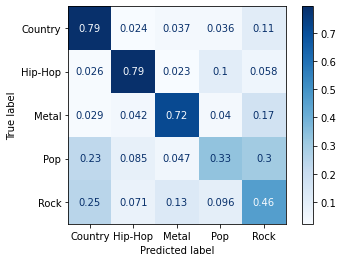

In [20]:
plot_confusion_matrix(nb_pipe, X_test_nb, y_test_nb,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

Show the classification report - precision, recall, f1 for each class.

In [25]:
nb_pred = nb_pipe.predict(X_test_nb)
print(classification_report(y_test_nb, nb_pred))

              precision    recall  f1-score   support

     Country       0.52      0.79      0.63      1649
     Hip-Hop       0.76      0.79      0.77      1883
       Metal       0.72      0.72      0.72      1846
         Pop       0.57      0.33      0.42      2226
        Rock       0.46      0.46      0.46      2392

    accuracy                           0.60      9996
   macro avg       0.61      0.62      0.60      9996
weighted avg       0.60      0.60      0.59      9996



The naive approach that only count words get accuracy of about 60%.

### Text classification using Word Vectors
#### Average word vectors
Do the same, using a classifier that averages the word vectors of words in the document.

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
# get average vector for each song
word_vecs_avg = np.zeros((songs.shape[0], 300))

# we add words relativaly to number of times they appear in the song, we could remove duplicates instead which would lead to different results
for i, song in tqdm(enumerate(songs.clean_lyrics), position=0, leave=True):
    splits = song.split()
    word_vecs_sum = np.zeros((300,))
    count = 0;

    for word in splits:
        if (word in model_5.wv.vocab):
          word_vecs_sum += model_5.wv[word]
          count = count + 1

    word_vecs_avg[i] = word_vecs_sum / count

49976it [00:24, 2041.89it/s]


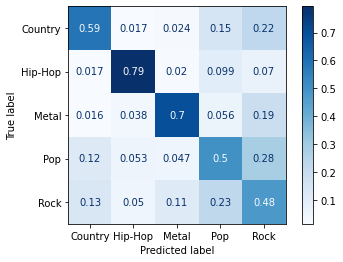

In [47]:
# split to train and test
X_train_avg, X_test_avg, y_train_avg, y_test_avg = train_test_split(word_vecs_avg, y_nb, test_size = 0.2)

# fit random forest
forest = RandomForestClassifier()
forest.fit(X_train_avg, y_train_avg)

# Confusion matrix
plot_confusion_matrix(forest, X_test_avg, y_test_avg,
                                 cmap=plt.cm.Blues,
                                 normalize='true')

In [48]:
# classification report
forest_pred = forest.predict(X_test_avg)
print(classification_report(y_test_avg, forest_pred))

              precision    recall  f1-score   support

     Country       0.61      0.59      0.60      1675
     Hip-Hop       0.83      0.79      0.81      1986
       Metal       0.75      0.70      0.72      1865
         Pop       0.50      0.50      0.50      2143
        Rock       0.43      0.48      0.45      2327

    accuracy                           0.61      9996
   macro avg       0.62      0.61      0.62      9996
weighted avg       0.61      0.61      0.61      9996



Averaging the song words to get a word that describe it and predict its genre performed worse.

#### TfIdf Weighting
Do the same, using a classifier that averages the word vectors of words in the document, weighting each word by its TfIdf.


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [73]:
# calculate tfidfs
tf = TfidfVectorizer()
tfidf_matrix =  tf.fit_transform(X_nb)
index_value = {i[1]:i[0] for i in tf.vocabulary_.items()}
fully_indexed = []

for row in tfidf_matrix:
    fully_indexed.append({index_value[column]:value for (column,value) in zip(row.indices,row.data)})

# Add avg vectors weighting each word by its TfIdf
for i, song in tqdm(enumerate(songs.clean_lyrics), position=0, leave=True):
    words = song.split()
    words = list( dict.fromkeys(words) ) # remove duplicates, adding each word once
    word_vecs_sum = np.zeros((300,))
    
    for word in words:
        if (word in model_5.wv.vocab) & (word in fully_indexed[i]):
          word_vecs_sum += model_5.wv[word] * fully_indexed[i][word]
          
    word_vecs_avg[i] = word_vecs_sum

49976it [00:40, 1236.87it/s]


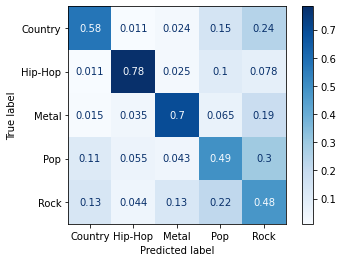

In [25]:
# split to train and test
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(word_vecs_avg, y_nb, test_size = 0.2)

# fit random forest
forest = RandomForestClassifier()
forest.fit(X_train_tfidf, y_train_tfidf)

# Confusion matrix
plot_confusion_matrix(forest, X_test_tfidf, y_test_tfidf,
                                 cmap=plt.cm.Blues,
                                 normalize='true')        

In [75]:
# classification report
tfidf_pred = forest.predict(X_test_tfidf)
print(classification_report(y_test_tfidf, tfidf_pred))

              precision    recall  f1-score   support

     Country       0.62      0.59      0.60      1670
     Hip-Hop       0.86      0.78      0.82      1956
       Metal       0.74      0.71      0.72      1809
         Pop       0.51      0.50      0.50      2182
        Rock       0.44      0.51      0.47      2379

    accuracy                           0.61      9996
   macro avg       0.63      0.62      0.62      9996
weighted avg       0.62      0.61      0.61      9996



Results are quiet similar to using the average with taking account words with number of apperance that we performed in the previous task.

### Text classification using ConvNet
Do the same, using a ConvNet.  
The ConvNet should get as input a 2D matrix where each column is an embedding vector of a single word, and words are in order. Use zero padding so that all matrices have a similar length.  
Some songs might be very long. Trim them so you keep a maximum of 128 words (after cleaning stop words and rare words).  
Initialize the embedding layer using the word vectors that you've trained before, but allow them to change during training.  

Extra: Try training the ConvNet with 2 slight modifications:
1. freezing the the weights trained using Word2vec (preventing it from updating)
1. random initialization of the embedding layer

You are encouraged to try this question on your own.  

You might prefer to get ideas from the paper "Convolutional Neural Networks for Sentence Classification" (Kim 2014, [link](https://arxiv.org/abs/1408.5882)).

There are several implementations of the paper code in PyTorch online (see for example [this repo](https://github.com/prakashpandey9/Text-Classification-Pytorch) for a PyTorch implementation of CNN and other architectures for text classification). If you get stuck, they might provide you with a reference for your own code.

### Note ###
We created another implemetation to this question, where instead of using the embedded layer the input is the embedded word. vectors for each song.

We focused on this solution where the input contains the word indexes for each song and the predifined embeddings are sent to the embedded layer since the input of the other solution cosumed a large amount of RAM and caused crushes of the notebook.

We included that solution in a different notebook that we submitted as well.

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, RandomSampler, DataLoader, SequentialSampler
import time
import torch.nn.functional as F
import copy
from torch.optim import lr_scheduler
import itertools

In [17]:
# Use cuda if present
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device available for running: ")
print(device)

Device available for running: 
cuda


In [25]:
# a row for each song where each column is a word index, in order and without rare words
def get_song_vec_mat(tokenized_lyrics):
    songs_embeddings = torch.zeros((songs.shape[0], 128))

    for song_ind, song in tqdm(enumerate(tokenized_lyrics), position=0, leave=True):
        words_list = song.split()
        padded_X = np.zeros(128)
        i = 0

        for word in words_list:
          if i > 127:
            break

          if word in model_5.wv.vocab:
              padded_X[i] = model_5.wv.vocab[word].index
              i += 1

        songs_embeddings[song_ind,:] += padded_X

    return songs_embeddings

In [28]:
# create songs matrix
songs_mat = get_song_vec_mat(songs["clean_lyrics"])
songs_mat = songs_mat.long()

49976it [00:23, 2091.49it/s]


In [30]:
# Convert train and validation sets to torch.Tensors and load them to DataLoader

def data_loader(train_inputs, val_inputs, train_labels, val_labels, batch_size=50):
    
    # Convert data type to torch.Tensor
    train_inputs, val_inputs, train_labels, val_labels =\
    tuple(torch.tensor(data) for data in
          [train_inputs, val_inputs, train_labels, val_labels])
    train_labels = train_labels.long()
    val_labels = val_labels.long()

    # Specify batch_size
    batch_size = 50

    # Create DataLoader for training data
    train_data = TensorDataset(train_inputs, train_labels)
    train_sampler = RandomSampler(train_data)
    train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

    # Create DataLoader for validation data
    val_data = TensorDataset(val_inputs, val_labels)
    val_sampler = SequentialSampler(val_data)
    val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

    return train_dataloader, val_dataloader

In [31]:
# create labels and split to train and test
labels = pd.Categorical(songs.genre.values).codes
labels_names = ['Country', 'Hip-Hop', 'Metal', 'Pop', 'Rock']
X_net_train, X_net_test, y_net_train, y_net_test = train_test_split(songs_mat, labels, test_size = 0.2)

# Load data to PyTorch DataLoader
train_dataloader, val_dataloader = \
data_loader(X_net_train, X_net_test, y_net_train, y_net_test, batch_size=50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [15]:
# CNN network for text classification

class CNN_NLP(nn.Module):
    
    def __init__(self,
                 pretrained_embedding=None,
                 freeze_embedding=False,
                 vocab_size=None,
                 embed_dim=300,
                 filter_sizes=[3, 4, 5],
                 num_filters=[100, 100, 100],
                 num_classes=5,
                 dropout=0.5):

        super(CNN_NLP, self).__init__()
        
        # Embedding layer
        if pretrained_embedding is not None:
            self.vocab_size, self.embed_dim = pretrained_embedding.shape
            
            self.embedding = nn.Embedding.from_pretrained(pretrained_embedding,
                                                          freeze=freeze_embedding)
            
        else:
            self.embed_dim = embed_dim
            self.embedding = nn.Embedding(num_embeddings=vocab_size,
                                          embedding_dim=self.embed_dim,
                                          padding_idx=0,
                                          max_norm=5.0)
        # Conv Network
        self.conv1d_list = nn.ModuleList([
            nn.Conv1d(in_channels=self.embed_dim,
                      out_channels=num_filters[i],
                      kernel_size=filter_sizes[i])
            for i in range(len(filter_sizes))
        ])
        
        # Fully-connected layer and Dropout
        self.fc = nn.Linear(np.sum(num_filters), num_classes)
        self.dropout = nn.Dropout(p=dropout)

    def forward(self, input_ids):

        # Get embeddings from `input_ids`. Output shape: (b, max_len, embed_dim)
        x_embed = self.embedding(input_ids).float()

        # Permute `x_embed` to match input shape requirement of `nn.Conv1d`.
        # Output shape: (b, embed_dim, max_len)
        x_reshaped = x_embed.permute(0, 2, 1)

        # Apply CNN and ReLU. Output shape: (b, num_filters[i], L_out)
        x_conv_list = [F.relu(conv1d(x_reshaped)) for conv1d in self.conv1d_list]

        # Max pooling. Output shape: (b, num_filters[i], 1)
        x_pool_list = [F.max_pool1d(x_conv, kernel_size=x_conv.shape[2])
            for x_conv in x_conv_list]
        
        # Concatenate x_pool_list to feed the fully connected layer.
        # Output shape: (b, sum(num_filters))
        x_fc = torch.cat([x_pool.squeeze(dim=2) for x_pool in x_pool_list],
                         dim=1)
        
        # Compute logits. Output shape: (b, n_classes)
        logits = self.fc(self.dropout(x_fc))

        return logits

In [3]:
# Instantiate a CNN model and an optimizer

def initilize_model(pretrained_embedding=None,
                    freeze_embedding=False,
                    vocab_size=None,
                    embed_dim=300,
                    filter_sizes=[3, 4, 5],
                    num_filters=[100, 100, 100],
                    num_classes=5,
                    dropout=0.5,
                    learning_rate=0.01):

    assert (len(filter_sizes) == len(num_filters)), "filter_sizes and \
    num_filters need to be of the same length."

    # Instantiate CNN model
    cnn_model = CNN_NLP(pretrained_embedding=pretrained_embedding,
                        freeze_embedding=freeze_embedding,
                        vocab_size=vocab_size,
                        embed_dim=embed_dim,
                        filter_sizes=filter_sizes,
                        num_filters=num_filters,
                        num_classes=num_classes,
                        dropout=dropout)
    
    # Send model to `device` (GPU/CPU)
    cnn_model.to(device)

    # Instantiate Adadelta optimizer
    optimizer = optim.Adadelta(cnn_model.parameters(),
                               lr=learning_rate,
                               rho=0.95)

    return cnn_model, optimizer

In [19]:
# Specify loss function
loss_fn = nn.CrossEntropyLoss()

# train the model
def train(model, optimizer, train_dataloader, val_dataloader=None, epochs=10):
    
    # Tracking best validation accuracy
    best_accuracy = 0

    # Start training loop
    print("Start training...\n")
    print(f"{'Epoch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {\
    'Val Acc':^9} | {'Elapsed':^9}")
    print("-"*60)

    for epoch_i in range(epochs):
        
        #               Training
        
        # Tracking time and loss
        t0_epoch = time.time()
        total_loss = 0

        # Put the model into the training mode
        model.train()

        for step, batch in enumerate(train_dataloader):
            # Load batch to GPU
            b_input_ids, b_labels = tuple(t.to(device) for t in batch)

            # Zero out any previously calculated gradients
            model.zero_grad()

            # Perform a forward pass. This will return logits.
            logits = model(b_input_ids)
            # Compute loss and accumulate the loss values
            loss = loss_fn(logits, b_labels)
            total_loss += loss.item()

            # Perform a backward pass to calculate gradients
            loss.backward()

            # Update parameters
            optimizer.step()

        # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)

        
        #               Evaluation
        
        if val_dataloader is not None:
            # After the completion of each training epoch, measure the model's
            # performance on our validation set.
            val_loss, val_accuracy = evaluate(model, val_dataloader)

            # Track the best accuracy
            if val_accuracy > best_accuracy:
                best_accuracy = val_accuracy
                
                # deepcopy the model
                best_model_wts = copy.deepcopy(model.state_dict())

            # Print performance over the entire training data
            time_elapsed = time.time() - t0_epoch
            print(f"{epoch_i + 1:^7} | {avg_train_loss:^12.6f} | {\
            val_loss:^10.6f} | {val_accuracy:^9.2f} | {time_elapsed:^9.2f}")
            
    print("\n")
    print(f"Training complete! Best accuracy: {best_accuracy:.2f}%.")
    
    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [33]:
# measure the model performance on the val set after each epoch

def evaluate(model, val_dataloader):
    
    # Put the model into the evaluation mode. The dropout layers are disabled
    # during the test time.
    model.eval()

    # Tracking variables
    val_accuracy = []
    val_loss = []

    # For each batch in our validation set...
    for batch in val_dataloader:
        # Load batch to GPU
        b_input_ids, b_labels = tuple(t.to(device) for t in batch)

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids)

        # Compute loss
        loss = loss_fn(logits, b_labels)
        val_loss.append(loss.item())

        # Get the predictions
        preds = torch.argmax(logits, dim=1).flatten()

        # Calculate the accuracy rate
        accuracy = (preds == b_labels).cpu().numpy().mean() * 100
        val_accuracy.append(accuracy)

    # Compute the average accuracy and loss over the validation set.
    val_loss = np.mean(val_loss)
    val_accuracy = np.mean(val_accuracy)

    return val_loss, val_accuracy

In [46]:
# train a network with initialize the embedding layer using the word vectors that was trained before, but allow them to change during training

cnn_non_static, optimizer = initilize_model(pretrained_embedding=torch.tensor(model_5.wv.vectors).float(),
                                            freeze_embedding=False,
                                            learning_rate=0.25,
                                            dropout=0.5)
best_model = train(cnn_non_static, optimizer, train_dataloader, val_dataloader, epochs=20)

Start training...

 Epoch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
------------------------------------------------------------
   1    |   1.089622   |  0.982737  |   60.79   |  376.90  
   2    |   0.990079   |  0.970967  |   60.16   |  377.16  
   3    |   0.947163   |  0.926758  |   62.62   |  376.59  
   4    |   0.914504   |  0.936248  |   62.12   |  375.75  
   5    |   0.876746   |  0.931542  |   62.70   |  375.45  
   6    |   0.845450   |  0.931560  |   62.58   |  375.87  
   7    |   0.819012   |  0.941145  |   62.60   |  375.93  
   8    |   0.781683   |  0.947093  |   62.10   |  376.15  
   9    |   0.750875   |  0.948202  |   62.73   |  376.34  
  10    |   0.717152   |  0.952152  |   62.91   |  375.76  
  11    |   0.690436   |  0.983118  |   62.44   |  376.82  
  12    |   0.664049   |  0.991507  |   62.60   |  376.56  
  13    |   0.631284   |  1.012903  |   62.66   |  377.46  
  14    |   0.607383   |  1.034709  |   62.32   |  378.35  
  15    |   0.581785

In [36]:
def plot_confusion_matrix_net(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=-45)
    plt.yticks(tick_marks, classes)

    fmt = '.0f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

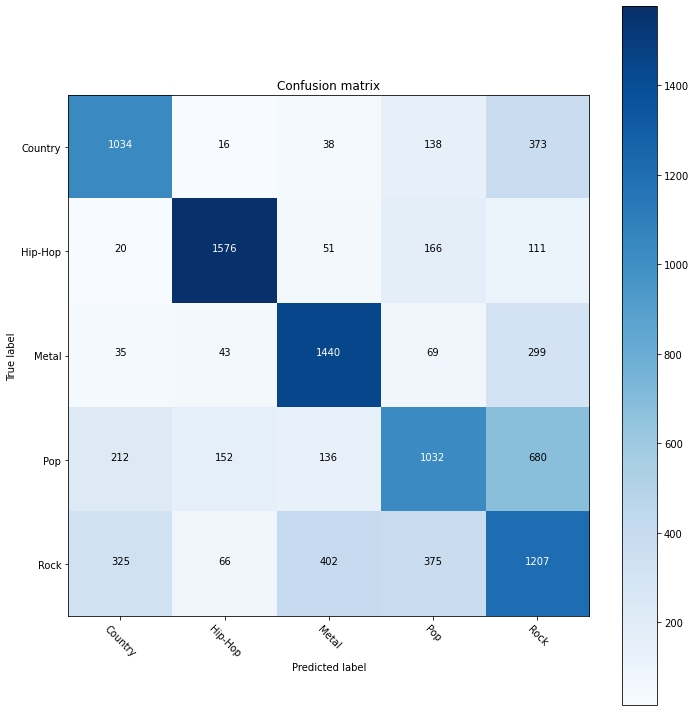

In [49]:
confusion_matrix = torch.zeros(5, 5)

with torch.no_grad():
    for i, (inputs, classes) in enumerate(val_dataloader):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = best_model(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

plot_confusion_matrix_net(cm=confusion_matrix,classes=labels_names)

In [39]:
def get_predictions(model, data_loader):
    model.eval()
    predictions = []
    real_values = []
  
    with torch.no_grad():
    
        for inputs, labels in data_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            predictions.extend(preds)
            real_values.extend(labels)
  
    predictions = torch.as_tensor(predictions).cpu()
    real_values = torch.as_tensor(real_values).cpu()
    return predictions, real_values

In [53]:
y_cnn_pred, y_cnn_test = get_predictions(best_model, val_dataloader)
print(classification_report(y_cnn_test, y_cnn_pred, target_names=labels_names))

              precision    recall  f1-score   support

     Country       0.64      0.65      0.64      1599
     Hip-Hop       0.85      0.82      0.83      1924
       Metal       0.70      0.76      0.73      1886
         Pop       0.58      0.47      0.52      2212
        Rock       0.45      0.51      0.48      2375

    accuracy                           0.63      9996
   macro avg       0.64      0.64      0.64      9996
weighted avg       0.63      0.63      0.63      9996



Extra: Try training the ConvNet with 2 slight modifications:

1. freezing the the weights trained using Word2vec (preventing it from updating)

In [54]:
cnn_static, optimizer = initilize_model(pretrained_embedding=torch.tensor(model_5.wv.vectors).float(),
                                            freeze_embedding=True,
                                            learning_rate=0.25,
                                            dropout=0.5)
best_static = train(cnn_static, optimizer, train_dataloader, val_dataloader, epochs=20)

Start training...

 Epoch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
------------------------------------------------------------
   1    |   1.089374   |  0.977707  |   60.05   |  213.58  
   2    |   0.994092   |  0.942089  |   62.15   |  213.52  
   3    |   0.948796   |  0.953646  |   60.78   |  213.02  
   4    |   0.915143   |  0.924551  |   62.28   |  212.89  
   5    |   0.883623   |  0.929938  |   63.12   |  213.00  
   6    |   0.851984   |  0.961159  |   61.27   |  212.68  
   7    |   0.820945   |  0.947043  |   62.06   |  212.80  
   8    |   0.792604   |  0.945626  |   62.73   |  213.25  
   9    |   0.762041   |  0.954601  |   62.88   |  212.92  
  10    |   0.731272   |  0.993275  |   60.85   |  212.92  
  11    |   0.703181   |  0.973278  |   62.24   |  213.09  
  12    |   0.676421   |  1.004196  |   61.68   |  212.88  
  13    |   0.658651   |  1.002459  |   61.51   |  212.97  
  14    |   0.628794   |  1.014005  |   62.01   |  213.42  
  15    |   0.612882

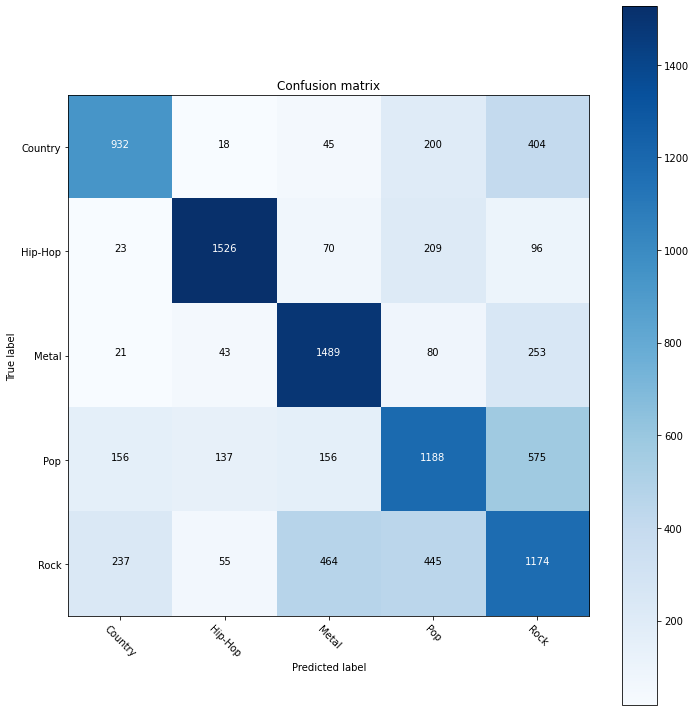

In [55]:
confusion_matrix = torch.zeros(5, 5)

with torch.no_grad():
    for i, (inputs, classes) in enumerate(val_dataloader):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = best_static(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

plot_confusion_matrix_net(cm=confusion_matrix,classes=labels_names)

In [56]:
y_cnn_pred, y_cnn_test = get_predictions(best_static, val_dataloader)
print(classification_report(y_cnn_test, y_cnn_pred, target_names=labels_names))

              precision    recall  f1-score   support

     Country       0.68      0.58      0.63      1599
     Hip-Hop       0.86      0.79      0.82      1924
       Metal       0.67      0.79      0.72      1886
         Pop       0.56      0.54      0.55      2212
        Rock       0.47      0.49      0.48      2375

    accuracy                           0.63      9996
   macro avg       0.65      0.64      0.64      9996
weighted avg       0.64      0.63      0.63      9996



2. random initialization of the embedding layer

In [34]:
cnn_random, optimizer = initilize_model(vocab_size=len(model_5.wv.vocab),learning_rate=0.25,
                                            dropout=0.5)
best_random = train(cnn_random, optimizer, train_dataloader, val_dataloader, epochs=20)

Start training...

 Epoch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
------------------------------------------------------------
   1    |   1.305103   |  1.106304  |   54.46   |   10.29  
   2    |   1.111621   |  1.035176  |   58.97   |   10.20  
   3    |   1.025801   |  1.006164  |   59.49   |   10.27  
   4    |   0.960064   |  0.990274  |   59.86   |   10.30  
   5    |   0.894579   |  0.974939  |   61.33   |   10.31  
   6    |   0.831193   |  0.963219  |   61.73   |   10.34  
   7    |   0.761158   |  0.966549  |   61.75   |   10.36  
   8    |   0.706179   |  0.965466  |   62.40   |   10.41  
   9    |   0.639026   |  0.984815  |   62.11   |   10.42  
  10    |   0.576692   |  0.996485  |   62.31   |   10.41  
  11    |   0.527471   |  1.017461  |   61.79   |   10.43  
  12    |   0.483162   |  1.043539  |   61.84   |   10.44  
  13    |   0.432462   |  1.072247  |   61.77   |   10.45  
  14    |   0.403974   |  1.089512  |   62.04   |   10.50  
  15    |   0.360191

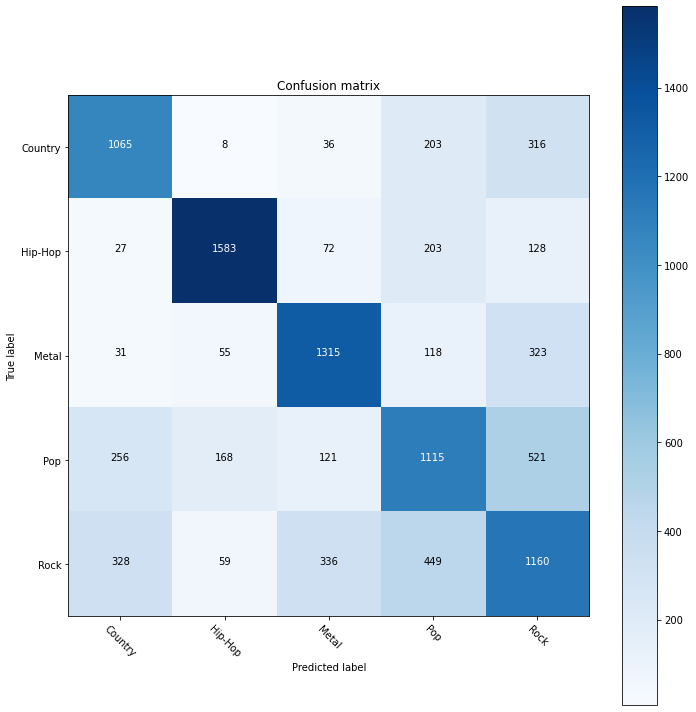

In [37]:
confusion_matrix = torch.zeros(5, 5)

with torch.no_grad():
    for i, (inputs, classes) in enumerate(val_dataloader):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = best_random(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

plot_confusion_matrix_net(cm=confusion_matrix,classes=labels_names)

In [42]:
y_cnn_pred, y_cnn_test = get_predictions(best_random, val_dataloader)
print(classification_report(y_cnn_test, y_cnn_pred, target_names=labels_names))

              precision    recall  f1-score   support

     Country       0.62      0.65      0.64      1628
     Hip-Hop       0.85      0.79      0.81      2013
       Metal       0.70      0.71      0.71      1842
         Pop       0.53      0.51      0.52      2181
        Rock       0.47      0.50      0.49      2332

    accuracy                           0.62      9996
   macro avg       0.64      0.63      0.63      9996
weighted avg       0.63      0.62      0.63      9996



Results are pretty similar for the 3 embedding options. It does seem that the model get more fitted to the train data when initializing random weights.